<a href="https://colab.research.google.com/github/Saipatel3585/retail-sales-eda/blob/main/retail_sales_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /kaggle/input/retail-sales-dataset
CSV files found: ['/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv']
Loading data from: /kaggle/input/retail-sales-dataset/retail_sales_dataset.csv
Dataset preview:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Dataset columns:
Index(['Transaction ID', 'Date',

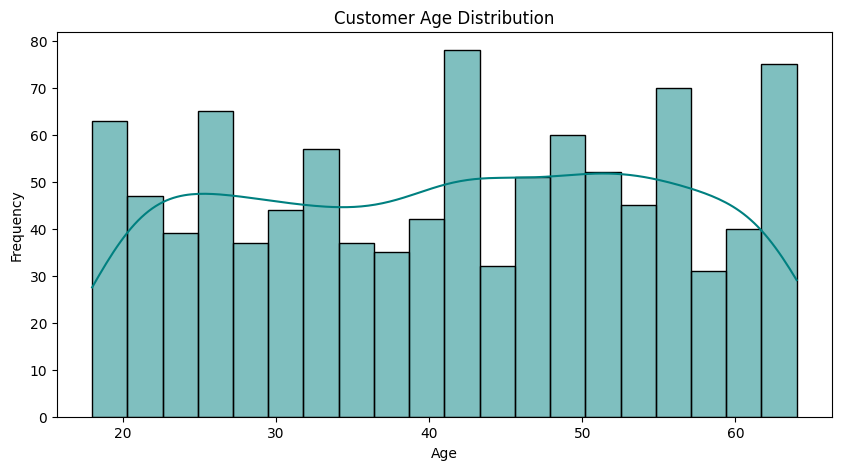

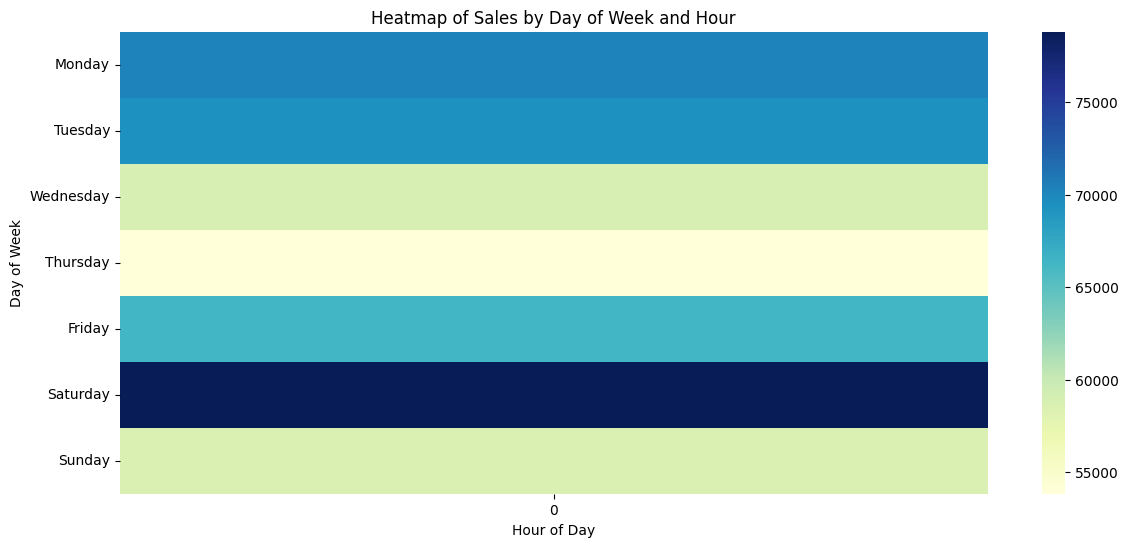


--- Business Recommendations ---
1. Monitor and plan inventory according to monthly sales trends.
2. Target marketing campaigns based on dominant customer age groups and gender distribution.
3. Prioritize stocking of high revenue product categories.
4. Use sales heatmap insights to optimize staffing during peak sales hours and days.
5. Develop promotions aimed at boosting sales in slower periods or segments.


In [4]:
!pip install pandas numpy matplotlib seaborn plotly
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kagglehub

# Step 1: Download the dataset using kagglehub
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")
print("Path to dataset files:", path)

# Step 2: Locate CSV file(s) inside the downloaded folder
csv_files = glob.glob(os.path.join(path, "*.csv"))
print("CSV files found:", csv_files)

if not csv_files:
    raise FileNotFoundError(f"No CSV file found in downloaded dataset folder: {path}")

# Use the first CSV file (adjust if needed)
csv_file = csv_files[0]
print(f"Loading data from: {csv_file}")

# Step 3: Load CSV into pandas DataFrame
df = pd.read_csv(csv_file)
print("Dataset preview:")
print(df.head())

print("\nDataset columns:")
print(df.columns)

# Step 4: Data Cleaning & Preprocessing

# Drop rows missing essential info
df = df.dropna(subset=['Transaction ID', 'Date', 'Customer ID'])

# Ensure numeric columns are properly typed, ignore if missing
numeric_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows with invalid dates
df = df.dropna(subset=['Date'])

# Create Age Group bins (only if 'Age' present)
if 'Age' in df.columns:
    bins = [0, 24, 34, 44, 54, 200]
    labels = ['18-24', '25-34', '35-44', '45-54', '55+']
    df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Create Month column for time series analysis
df['Month'] = df['Date'].dt.strftime('%Y-%m')

# Step 5: Basic Descriptive Stats and Metrics
total_transactions = len(df)
total_revenue = df['Total Amount'].sum()
avg_transaction_value = df['Total Amount'].mean()
unique_customers = df['Customer ID'].nunique()

print(f"\nTotal Transactions: {total_transactions:,}")
print(f"Total Revenue: ₹{int(total_revenue):,}")
print(f"Average Transaction Value: ₹{int(avg_transaction_value):,}")
print(f"Unique Customers: {unique_customers:,}")

# Step 6: Gender Distribution Pie Chart (if 'Gender' exists)
if 'Gender' in df.columns:
    gender_counts = df['Gender'].value_counts().reset_index()
    gender_counts.columns = ['Gender', 'Count']
    fig = px.pie(gender_counts, names='Gender', values='Count', title='Gender Distribution', hole=0.4)
    fig.show()

# Step 7: Product Category Analysis (if 'Product Category' exists)
if 'Product Category' in df.columns:
    category_perf = df.groupby('Product Category').agg({
        'Transaction ID': 'count',
        'Total Amount': 'sum',
        'Quantity': 'mean'
    }).rename(columns={
        'Transaction ID': 'Transactions',
        'Total Amount': 'Revenue',
        'Quantity': 'Avg Quantity'
    }).reset_index()

    fig = px.bar(category_perf.sort_values('Revenue', ascending=False),
                 x='Product Category', y='Revenue',
                 title='Sales by Product Category',
                 text='Revenue',
                 color='Product Category')
    fig.show()

# Step 8: Monthly Sales Trend
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
fig = px.line(monthly_sales, x='Month', y='Total Amount', title='Monthly Sales Trend', markers=True)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Step 9: Age Distribution Histogram (if 'Age' exists)
if 'Age' in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='teal')
    plt.title('Customer Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Step 10: Heatmap of Sales by Day of Week and Hour (requires 'Date')
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

sales_pivot = df.pivot_table(index='DayOfWeek', columns='Hour', values='Total Amount', aggfunc='sum').fillna(0)

# Reorder days to a conventional order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_pivot = sales_pivot.reindex(days_order)

plt.figure(figsize=(14,6))
sns.heatmap(sales_pivot, cmap='YlGnBu')
plt.title('Heatmap of Sales by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

# Step 11: Actionable Recommendations
print("\n--- Business Recommendations ---")
print("1. Monitor and plan inventory according to monthly sales trends.")
print("2. Target marketing campaigns based on dominant customer age groups and gender distribution.")
print("3. Prioritize stocking of high revenue product categories.")
print("4. Use sales heatmap insights to optimize staffing during peak sales hours and days.")
print("5. Develop promotions aimed at boosting sales in slower periods or segments.")


